1. Code a simulated Ising model

In [2]:
import numpy as np

def random_spin_field(N, M):
  return np.random.choice([-1, 1], size = [N, M])

random_spin_field(10,10)

array([[ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1, -1, -1, -1,  1, -1,  1],
       [ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1,  1, -1,  1,  1, -1,  1, -1],
       [-1, -1, -1,  1,  1,  1,  1,  1,  1,  1],
       [-1, -1, -1,  1, -1, -1, -1,  1, -1,  1],
       [-1,  1,  1, -1, -1,  1, -1,  1,  1,  1],
       [-1,  1,  1, -1,  1,  1, -1,  1,  1, -1],
       [ 1, -1, -1, -1,  1,  1,  1, -1,  1, -1]])

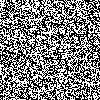

In [3]:
from PIL import Image

def display_spin_field(field):
  return Image.fromarray(np.uint8((field + 1) * 0.5 *255))

display_spin_field(random_spin_field(100, 100))

In [0]:
## Ising model
def ising_step(field, beta = 0.4):
  N, M = field.shape
  for n in range(N):
    for m in range(M):
      _ising_update(field, n, m, beta)
  return field

def _ising_update(field, n, m, beta):
  # loop from all neighboring spin
  total = 0
  N, M = field.shape
  for i in range(n-1, n+2):
    for j in range(m-1, m+2):
      if i == n and j == m:
        continue
      total += field[i % N,j % M]
  dE = 2 * field[n, m] * total
  if dE <= 0:
    field[n,m] += -1
  elif np.exp(-dE * beta) > np.random.rand():
    field[n,m] += -1

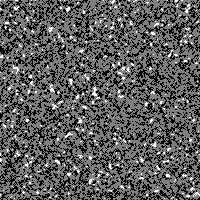

In [7]:
display_spin_field(ising_step(random_spin_field(200, 200)))

In [0]:
## Animate Sequence with ipywidgets
from ipywidgets import interact

def display_ising_sequence(images):
  def _show(frame = (0, len(images) - 1)):
    return display_spin_field(images[frame])
  return interact(_show)

In [11]:
images = [random_spin_field(200, 200)]

for i in range(50):
  images.append(ising_step(images[-1].copy()))

display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show>

In [0]:
%load_ext Cython

In [0]:
%%cython
import numpy as np

def cy_ising_step(field, beta = 0.4):
  N, M = field.shape
  for n in range(N):
    for m in range(M):
      _cy_ising_update(field, n, m, beta)
  return field

def _cy_ising_update(field, n, m, beta):
  # loop from all neighboring spin
  total = 0
  N, M = field.shape
  for i in range(n-1, n+2):
    for j in range(m-1, m+2):
      if i == n and j == m:
        continue
      total += field[i % N,j % M]
  dE = 2 * field[n, m] * total
  if dE <= 0:
    field[n,m] += -1
  elif np.exp(-dE * beta) > np.random.rand():
    field[n,m] += -1

In [16]:
field = random_spin_field(200, 200)
%timeit ising_step(field)
%timeit cy_ising_step(field)

1 loop, best of 3: 337 ms per loop
1 loop, best of 3: 398 ms per loop
